No-show appointments dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The original source of the dataset https://www.kaggle.com/joniarroba/noshowappointments.
# Questions:
- How is the distribution of gender among patients?
- What is the correlation between **Age** and **No-show** ?
- what is the impact of alcoholism on the showing up of patients to their appointment?
- What is the average age among gender of patients?
- How does receiving an SMS Message affect patients showing up to their appoinmemnt?


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
df_app = pd.read_csv('noshowappointments.csv')
df_app.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [84]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


How many rows and columns are exsisting in the dataset?

In [85]:
df_app.shape

(110527, 14)

There are 110527 rows and 14 columns.

Correcting typo if any and convert columns names to be in the same style.

In [86]:
df_app.rename(columns = {'PatientId':'Patient_ID', 'AppointmentID':'Appointment_ID', 'ScheduledDay':'Scheduled_Day',
                     'AppointmentDay':'Appointment_Day', 'Hipertension':'Hypertension', 'Handcap':'Handicap', 
                     'No-show':'No_show' }, 
          inplace=True)

In [87]:
df_app.head(1)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [88]:
sum(df_app.duplicated())

0

In [89]:
df_app.isnull().sum()

Patient_ID         0
Appointment_ID     0
Gender             0
Scheduled_Day      0
Appointment_Day    0
Age                0
Neighbourhood      0
Scholarship        0
Hypertension       0
Diabetes           0
Alcoholism         0
Handicap           0
SMS_received       0
No_show            0
dtype: int64

In [90]:
df_app.nunique()

Patient_ID          62299
Appointment_ID     110527
Gender                  2
Scheduled_Day      103549
Appointment_Day        27
Age                   104
Neighbourhood          81
Scholarship             2
Hypertension            2
Diabetes                2
Alcoholism              2
Handicap                5
SMS_received            2
No_show                 2
dtype: int64

**The dataset (Noshowappointments) has no missing values and no duplicated rows, now we need to clean the dataset.**

In [91]:
df_app[df_app['Age']<=0]

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


Age can not be equal to or less than zero, so I'm going to set values with zero or minus to NaN then will drop rows with NaN

In [92]:
df_app.loc[df_app['Age'] <= 0,'Age'] = np.nan

In [93]:
df_app[df_app['Age']<=0]

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


In [94]:
df_app.isnull().sum()

Patient_ID            0
Appointment_ID        0
Gender                0
Scheduled_Day         0
Appointment_Day       0
Age                3540
Neighbourhood         0
Scholarship           0
Hypertension          0
Diabetes              0
Alcoholism            0
Handicap              0
SMS_received          0
No_show               0
dtype: int64

Now the values equal to or less than zero are replaced by NaN. let's remove them.

In [95]:
df_app.dropna(inplace=True)

In [96]:
df_app.shape

(106987, 14)

Number of rows have decreaed to 106987.

In [97]:
df_app.isnull().sum()

Patient_ID         0
Appointment_ID     0
Gender             0
Scheduled_Day      0
Appointment_Day    0
Age                0
Neighbourhood      0
Scholarship        0
Hypertension       0
Diabetes           0
Alcoholism         0
Handicap           0
SMS_received       0
No_show            0
dtype: int64

Changing the values of (No_show) column to 0 and 1 so we can visualize it. (0 means patient showed up, 1 means patient didn't show up).

In [98]:
df_app.No_show[df_app['No_show']=='Yes'] ='1'
df_app.No_show[df_app['No_show']=='No'] ='0'

<ipython-input-98-f5e1e10839f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app.No_show[df_app['No_show']=='Yes'] ='1'
<ipython-input-98-f5e1e10839f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app.No_show[df_app['No_show']=='No'] ='0'


Changing the type of data to the correct type.

Patient_ID and Appointment_ID don't need to be in type of (int) because I'm not gonna use them in calculation or visualization.

In [99]:
df_app['Patient_ID'] = df_app.Patient_ID.astype(object)
df_app['Appointment_ID'] = df_app.Appointment_ID.astype(object)
df_app['Scheduled_Day'] = pd.to_datetime(df_app['Scheduled_Day'])
df_app['Appointment_Day'] = pd.to_datetime(df_app['Appointment_Day'])
df_app['No_show'] = df_app.No_show.astype(int)

In [100]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   Patient_ID       106987 non-null  object             
 1   Appointment_ID   106987 non-null  object             
 2   Gender           106987 non-null  object             
 3   Scheduled_Day    106987 non-null  datetime64[ns, UTC]
 4   Appointment_Day  106987 non-null  datetime64[ns, UTC]
 5   Age              106987 non-null  float64            
 6   Neighbourhood    106987 non-null  object             
 7   Scholarship      106987 non-null  int64              
 8   Hypertension     106987 non-null  int64              
 9   Diabetes         106987 non-null  int64              
 10  Alcoholism       106987 non-null  int64              
 11  Handicap         106987 non-null  int64              
 12  SMS_received     106987 non-null  int64              
 13 

Save the last version of the dataset after being cleaned to csv.

In [101]:
df_app.to_csv('updated_noshowappointments.csv', index=False)

In [102]:
df_app.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264,0.202641
std,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725,0.401969
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


The description shows that 25% pf patients are old 19, 50% are old 38 and the majority which is 75% are old 56.
In addition, The majority of patients that represents 75% have received SMS message and have showed up to their appointments. 

Exploring data.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hypertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handicap'}>],
       [<AxesSubplot:title={'center':'SMS_received'}>,
        <AxesSubplot:title={'center':'No_show'}>, <AxesSubplot:>]],
      dtype=object)

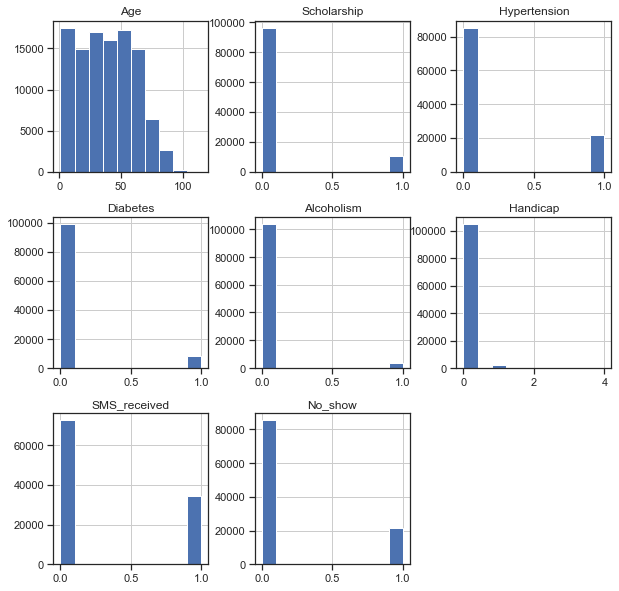

In [103]:
df_app.hist(figsize=(10,10))

From the histogram above we observe that the majority of patients are not alcoholic and not suffering from Diabetes, Hypertension or any kind of handicap.

In [104]:
df_app.value_counts(['Handicap'])

Handicap
0           104747
1             2041
2              183
3               13
4                3
dtype: int64

Handicap variable in contrast to the other independent variables has 5 types of values 0,1,2,3,4 that refers to the kind or degree of the handicap. Fortunally, The majority of patients have no kind of handicap.

- How is the distribution of gender among patients?

In [107]:
df_app.value_counts(['Gender'])

Gender
F         70118
M         36869
dtype: int64

The total number of female patients are 70118 while the total number of male are 36869, which means female patients represent the majority.

Text(0.5, 0, 'Gender')

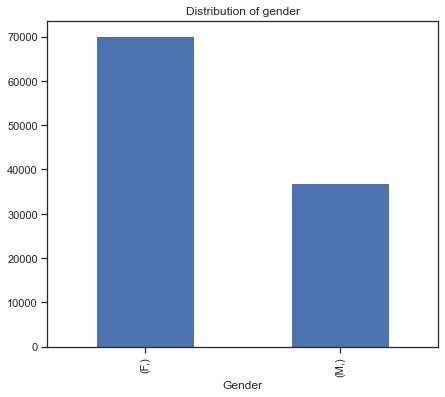

In [150]:
df_app.value_counts(['Gender']).plot(kind='bar', figsize=(7,6))
plt.title('Distribution of gender')
plt.xlabel('Gender')

From the bar chart the number of female patients are greater than the number of male patients.

- What is the correlation between **Age** and **No-show** ?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Age')

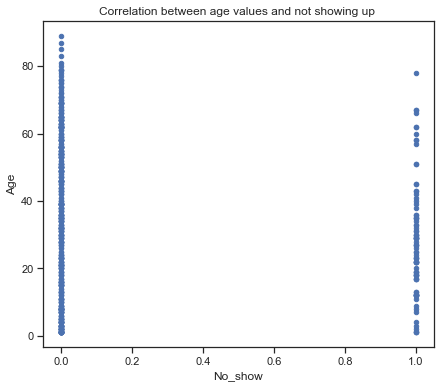

In [153]:
df_app.head(500).plot(x='No_show', y='Age', kind='scatter', figsize=(7,6))
plt.title('Correlation between age values and not showing up ')
plt.xlabel('No_show')
plt.ylabel('Age')

I set head(500) only of the data to make the visualization clear and readable and obviously makes sense.

From the visualization above it is clear that the number of patients those are not showing up are higher in the age less than 50 than in the age greater than 50. 
This means older paople have higher awareness of their health than young people.

In total, the number of patients showed up is graeter than the patients those didn't show up.

- what is the impact of alcoholism on the showing up of patients to their appointment?

Text(0.5, 1.0, "Impact of alcoholism on patients' showing up")

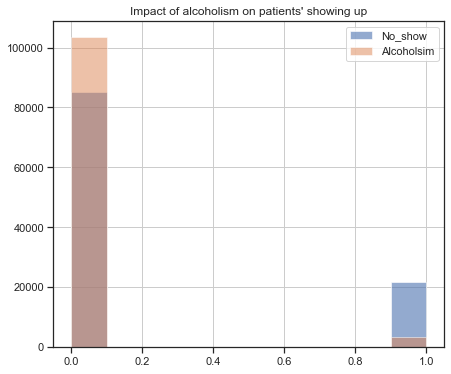

In [156]:
df_app['No_show'].hist(alpha=0.6, label='No_show', figsize=(7,6))
df_app['Alcoholism'].hist(alpha=0.5, label='Alcoholsim')
plt.legend()
plt.title('Impact of alcoholism on patients\' showing up')

From the bar chart we can observe that the alcoholic patients are sharply less than inalcoholic patients and simultaneously those who showed up are higher than those who didn't, so we can conclude that alcoholism can affect the patient showing up to their appointments. 

- What is the average age among gender of patients?

In [115]:
df_app.query('Gender=="F"').Age.mean(), df_app.query('Gender=="M"').Age.mean()

(39.84918280612681, 35.40041769508259)

Text(0.5, 1.0, 'The average age among gender of patient')

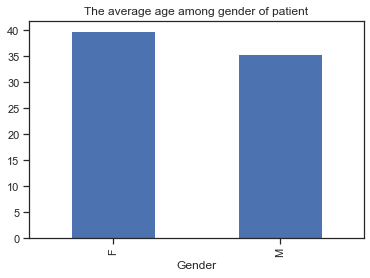

In [165]:
df_app.groupby('Gender').Age.mean().plot(kind='bar')
plt.title('The average age among gender of patient')

The average age of the female patients is higher than the average age of the male patients. 

- How does receiving an SMS Message affect patients showing up to their appoinmemnt?

In [135]:
received_SMS = df_app.SMS_received==1
notReceived_SMS = df_app.SMS_received==0

Text(0.5, 1.0, 'Impact of receiving an SMS message on showing up')

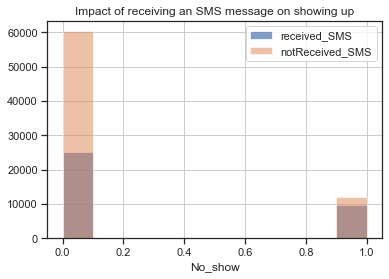

In [164]:
df_app.No_show[received_SMS].hist(alpha=0.7, label='received_SMS')
df_app.No_show[notReceived_SMS].hist(alpha=0.5, label='notReceived_SMS')
plt.legend()
plt.xlabel('No_show')
plt.title('Impact of receiving an SMS message on showing up')

The total number of patients who showed up without receiving an SMS message is greatr than those who did received ones, in other words we can say that receiving an SMS message as a reminder has a low impact in predicting wether the patient will show up or not.

# Limitations:

- One of the limitations that I have faced is identifying the values of age that equal or less than zero in which it doesn’t make sense to have patients with these age values, so I had to select between two choices either calculate the average of age and replace these values with the average or just drop the total rows, then I went with the second choice. 
- The column (Handicap) in contrast to other columns, contained 5 type of values (0,1,2,3,4) and I was confused if it is different categories of handicap or there are wrong values, so I was thinking to keep only 0 and 1 values and delete the rest but then I decided to consider these values as different categories of handicap and keep all values.


# Conclusion:

- The majority of patients which represents 75% are elderly those old 56 year. In addition, The same percentage 75% of patients have received SMS message and have showed up to their appointments.
- In general, the majority of patients are not alcoholic and not suffering from any heath conditions.
- The total number of female patients are greater than the number of male patients.
- The average age in the female patients is higher than the average age in the male patients. 
- The number of patients those didn't show up are higher in the age less than 50 than in the age greater than 50. This means older paople have higher awareness of their health than young people.
- In general, the number of patients who showed up is graeter than those who didn't.
- The alcoholic patients are sharply less than inalcoholic patients and simultaneously those who showed up are higher than those who didn't, so we can conclude that alcoholism can affect the patient showing up to their appointments. 
- The patients who showed up without receiving an SMS message is greatr than those who did received ones, in other words we can say that receiving an SMS message as a reminder has a low impact in predicting wether the patient will show up or not.

